<center><h1>作业1</h1></center>
<center><h3>韩嘉琪 2200012126</h4></center>

<h2>1. 用pandas读取外周血单细胞测序数据pmbc_data.csv，随机展示数据中的10行</h2>

In [1]:
# 导入需要用到的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import umap
import scikitplot as skplt

/opt/mamba/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [2]:
#读取数据
data_path = './personal/HW1/pbmc_data.csv'
df = pd.read_csv(data_path)
# 显示数据的前几行，以了解其结构
df.head()

,Unnamed: 0,TNFRSF4,CPSF3L,ATAD3C,C1orf86,RER1,TNFRSF25,TNFRSF9,CTNNBIP1,SRM,...,BACE2,SIK1,C21orf33,ICOSLG,SUMO3,SLC19A1,S100B,PRMT2,cell_type,cell_type_string
0,AAACATACAACCAC-1,-0.171470,-0.280812,-0.046677,-0.475169,-0.544024,4.928497,-0.038028,-0.280573,-0.341788,...,-0.102943,-0.222116,-0.312401,-0.121678,-0.521229,-0.098269,-0.209095,-0.531203,0,CD4 T
1,AAACATTGAGCTAC-1,-0.214582,-0.372653,-0.054804,-0.683391,0.633951,-0.334837,-0.045589,-0.498264,-0.541914,...,0.007155,-0.445372,1.629285,-0.058662,-0.857163,-0.266844,-0.313146,-0.596654,2,B
2,AAACATTGATCAGC-1,-0.376888,-0.295085,-0.057527,-0.520972,1.332648,-0.309362,-0.103108,-0.272526,-0.500799,...,-0.071774,-0.297857,-0.410920,-0.070431,-0.590720,-0.158656,-0.170876,1.379000,0,CD4 T
3,AAACCGTGCTTCCG-1,-0.285241,-0.281735,-0.052227,-0.484929,1.572680,-0.271825,-0.074552,-0.258875,-0.416752,...,-0.093818,-0.247770,2.552079,-0.097402,1.631684,-0.119462,-0.179120,-0.505669,1,CD14 Monocytes
4,AAACCGTGTATGCG-1,-0.256484,-0.220394,-0.046800,-0.345859,-0.333409,-0.208122,-0.069514,5.806440,-0.283112,...,-0.167350,-0.098665,-0.275836,-0.139482,-0.310095,-0.006877,-0.109614,-0.461946,4,NK


Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [3]:
# 查看dataframe的基本信息
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2638 entries, 0 to 2637
Columns: 1841 entries, Unnamed: 0 to cell_type_string
dtypes: float64(1838), int64(1), object(2)
memory usage: 37.1+ MB


Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [4]:
# 使用sample方法随机抽取10行
random_sample = df.sample(n=10)
# 展示随机抽取的10行
print(random_sample)

            Unnamed: 0   TNFRSF4    CPSF3L    ATAD3C   C1orf86      RER1  \
1308  CTAGGATGATCGTG-1 -0.267040  3.489413 -0.050223 -0.445472 -0.492807   
2135  TACTTGACTGGTGT-1 -0.224452 -0.246048 -0.046944 -0.401039 -0.423126   
897   CAGCACCTAGGCGA-1 -0.184433 -0.242918 -0.044807 -0.391335 -0.409056   
801   CAAGACTGAGTAGA-1 -0.279375 -0.281052 -0.051899 -0.483006 -0.552557   
1502  GACAACACATCGTG-1 -0.245903 -0.282524 -0.050381 -0.484030 -0.555453   
1750  GCTACAGAATCTTC-1 -0.190887 -0.212044 -0.043085 -0.322754 -0.298800   
1714  GCCTACACCTTGAG-1 -0.365748 -0.283200 -0.056207 -0.493652  1.492398   
1302  CTAGAGACACTTTC-1 -0.295872 -0.302380 -0.054099 -0.531799 -0.630210   
1649  GCAAGACTACTGGT-1 -0.387944 -0.284717 -0.057378 -0.498544 -0.573417   
1748  GCGTATGATGAGAA-1 -0.350938 -0.280932 -0.055344  1.759205  1.534185   

      TNFRSF25   TNFRSF9  CTNNBIP1       SRM  ...     BACE2      SIK1  \
1308 -0.251243 -0.069873 -0.220488 -0.372942  ... -0.115037 -0.204101   
2135 -0.222548 -0

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

<h2>2. 使用PCA和tSNE降维，用表格中提供的细胞类型作为颜色画出散点图</h2>

In [6]:
gene_columns = df.columns[1:-2]
# 获取基因数据
X = df[gene_columns].values
y = df['cell_type_string'].values
# 标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

<h3>2.1PCA</h3>

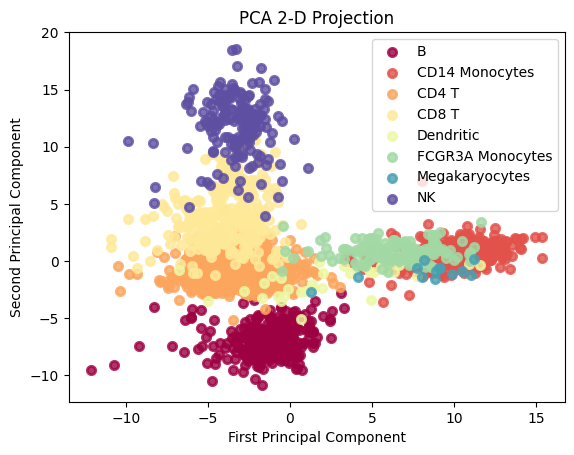

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [7]:
from sklearn.decomposition import PCA
# 初始化PCA
pca = PCA(random_state=1)
pca.fit(X)
skplt.decomposition.plot_pca_2d_projection(pca, X, y)
plt.show()

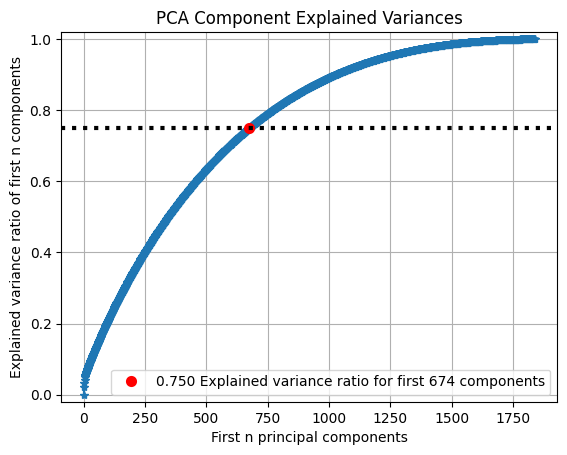

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [8]:
#展示主成分解释的方差比例
skplt.decomposition.plot_pca_component_variance(pca)
plt.show()

由上图可以看出，前674个主成分可解释75%的variance

<h3>2.2tSNE</h3>

/opt/mamba/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


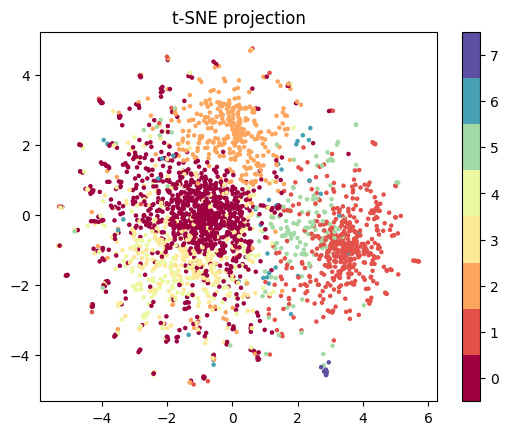

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [9]:
from sklearn.manifold import TSNE
# 初始化t-SNE实例，并进行降维
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)  
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c= df['cell_type'].values, cmap='Spectral', s=5)
plt.colorbar(boundaries=np.arange(len(set(y))+1)-0.5).set_ticks(np.arange(len(set(y))))
plt.title('t-SNE projection')
plt.show()

<h2>3.使用机器学习方法通过细胞的基因表达预测细胞的类型</h2>

In [10]:
#导入相关包
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [11]:
y = df['cell_type'].values
#分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 标准化数据
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

<h3>3.1.逻辑回归</h3>

In [33]:
#初始化模型
log_reg = LogisticRegression(max_iter=10000, random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
#评估模型
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
#交叉验证
log_reg_cv_scores = cross_val_score(log_reg, X, y, cv=5)
print("Logistic Regression Cross-Validation Scores:", log_reg_cv_scores)
print("Mean CV Accuracy:", np.mean(log_reg_cv_scores))

Logistic Regression:
Accuracy: 0.9412878787878788
Confusion Matrix:
 [[226   0   0   3   0   0   0   0]
 [  0 100   0   0   0   4   0   0]
 [  0   0  70   0   0   0   0   0]
 [ 14   0   0  39   2   0   0   0]
 [  0   0   0   1  33   0   0   0]
 [  1   4   0   0   0  23   0   0]
 [  0   1   1   0   0   0   4   0]
 [  0   0   0   0   0   0   0   2]]
Logistic Regression Cross-Validation Scores: [0.95075758 0.95265152 0.95075758 0.94497154 0.9487666 ]
Mean CV Accuracy: 0.9495809614168248


Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

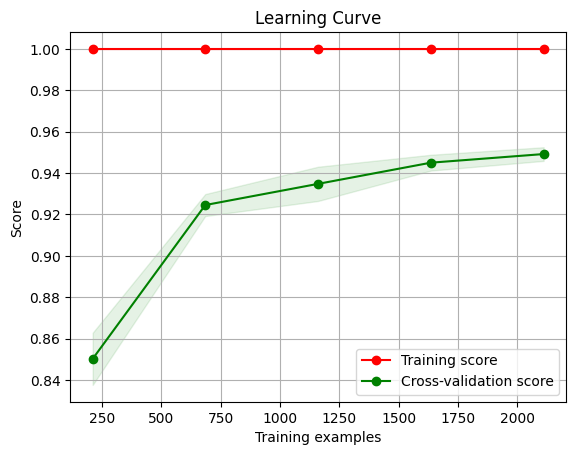

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [13]:
#绘制学习曲线
skplt.estimators.plot_learning_curve(log_reg, X, y)
plt.show()

<h3>3.2.SVM</h3>

In [34]:
svm_clf = SVC(kernel='linear', random_state=42,probability=True)
# 训练模型
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
y_pred_proba = svm_clf.predict_proba(X_test)
#评估模型
print("Support Vector Machine:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
#交叉验证
svm_cv_scores = cross_val_score(svm_clf, X, y, cv=5)
print("SVM Cross-Validation Scores:", svm_cv_scores)
print("Mean CV Accuracy:", np.mean(svm_cv_scores))

Support Vector Machine:
Accuracy: 0.9488636363636364
Confusion Matrix:
 [[226   0   0   3   0   0   0   0]
 [  0 101   0   0   0   3   0   0]
 [  0   0  70   0   0   0   0   0]
 [ 13   0   0  40   2   0   0   0]
 [  0   0   0   0  34   0   0   0]
 [  0   4   0   0   0  24   0   0]
 [  1   1   0   0   0   0   4   0]
 [  0   0   0   0   0   0   0   2]]
SVM Cross-Validation Scores: [0.95643939 0.96212121 0.94318182 0.943074   0.96204934]
Mean CV Accuracy: 0.9533731527801736


Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

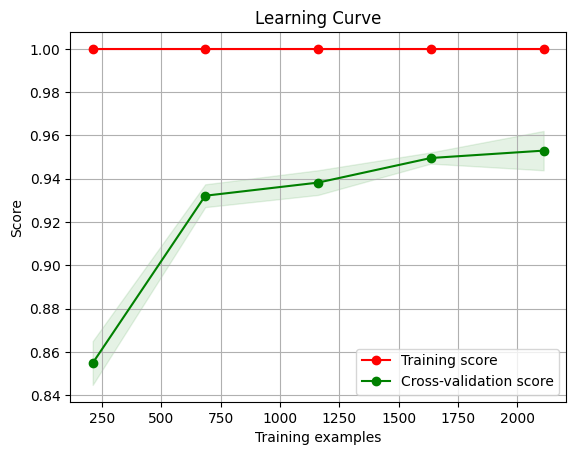

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [15]:
skplt.estimators.plot_learning_curve(svm_clf, X, y)
plt.show()

<h3>3.3决策树</h3>

In [35]:
# 初始化决策树模型
dt_clf = DecisionTreeClassifier(random_state=42)
# 训练决策树模型
dt_clf.fit(X_train, y_train)
# 预测
y_pred_dt = dt_clf.predict(X_test)
# 评估模型
print("Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
# 交叉验证
dt_cv_scores = cross_val_score(dt_clf, X, y, cv=5)
print("Decision Tree Cross-Validation Scores:", dt_cv_scores)
print("Mean CV Accuracy:", np.mean(dt_cv_scores))

Decision Tree:
Accuracy: 0.8882575757575758
Confusion Matrix:
 [[216   1   1   8   1   1   0   1]
 [  1  96   0   2   0   5   0   0]
 [  2   2  65   0   0   0   1   0]
 [  6   1   1  41   5   1   0   0]
 [  0   2   0   2  27   3   0   0]
 [  2   3   0   0   0  22   1   0]
 [  1   1   1   0   0   1   2   0]
 [  0   0   0   2   0   0   0   0]]
Decision Tree Cross-Validation Scores: [0.87878788 0.90151515 0.89204545 0.88804554 0.89373814]
Mean CV Accuracy: 0.8908264332125813


Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

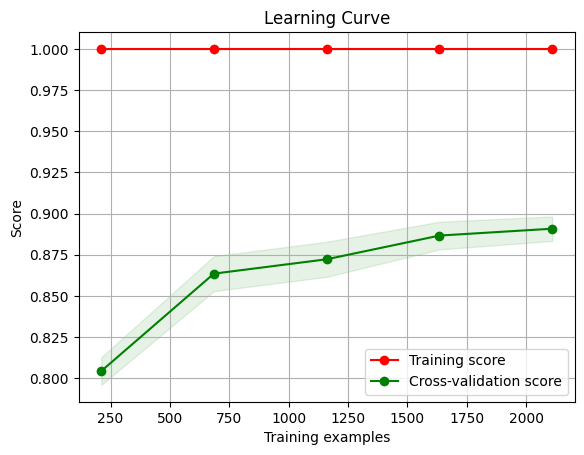

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [17]:
skplt.estimators.plot_learning_curve(dt_clf, X, y)
plt.show()

<h3>3.4随机森林</h3>

In [36]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
#评估模型
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
#交叉验证
rf_cv_scores = cross_val_score(rf_clf, X, y, cv=5)
print("Random Forest Cross-Validation Scores:", rf_cv_scores)
print("Mean CV Accuracy:", np.mean(rf_cv_scores))

Random Forest:
Accuracy: 0.9242424242424242
Confusion Matrix:
 [[226   0   1   2   0   0   0   0]
 [  0 100   0   0   0   4   0   0]
 [  0   0  69   0   0   1   0   0]
 [ 16   0   0  35   4   0   0   0]
 [  0   0   0   2  32   0   0   0]
 [  0   7   0   0   0  21   0   0]
 [  1   2   0   0   0   0   3   0]
 [  0   0   0   0   0   0   0   2]]
Random Forest Cross-Validation Scores: [0.92613636 0.93181818 0.92613636 0.92030361 0.92220114]
Mean CV Accuracy: 0.9253191305847853


Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

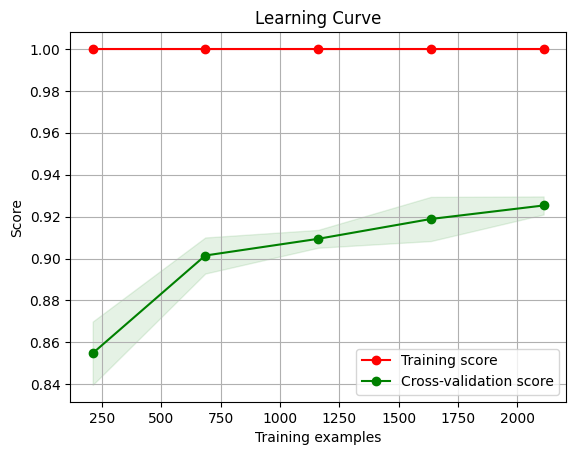

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [19]:
skplt.estimators.plot_learning_curve(rf_clf, X, y)
plt.show()

<h2>4.方法评估与比较</h2>

<h3>4.1准确率

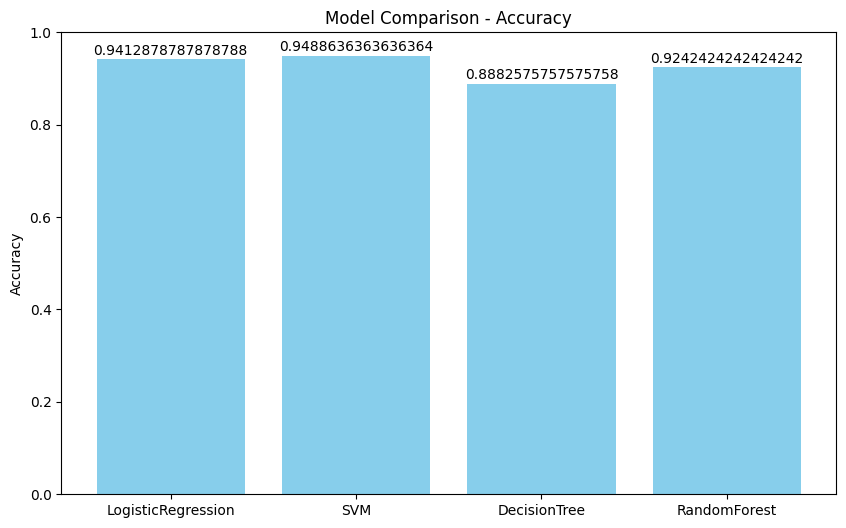

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [27]:
# 准确率比较
accuracies = [accuracy_score(y_test, y_pred_log_reg),accuracy_score(y_test, y_pred_svm),accuracy_score(y_test, y_pred_dt),accuracy_score(y_test, y_pred_rf)]
model_names = ['LogisticRegression','SVM','DecisionTree','RandomForest']

plt.figure(figsize=(10, 6))
plt.bar(model_names,accuracies,color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim(0, 1)
# 标注每组数据对应的值
for i, h in enumerate(accuracies):
    plt.text(i, h + 0.01, str(h), ha='center')
plt.show()

<h3>4.2混淆矩阵

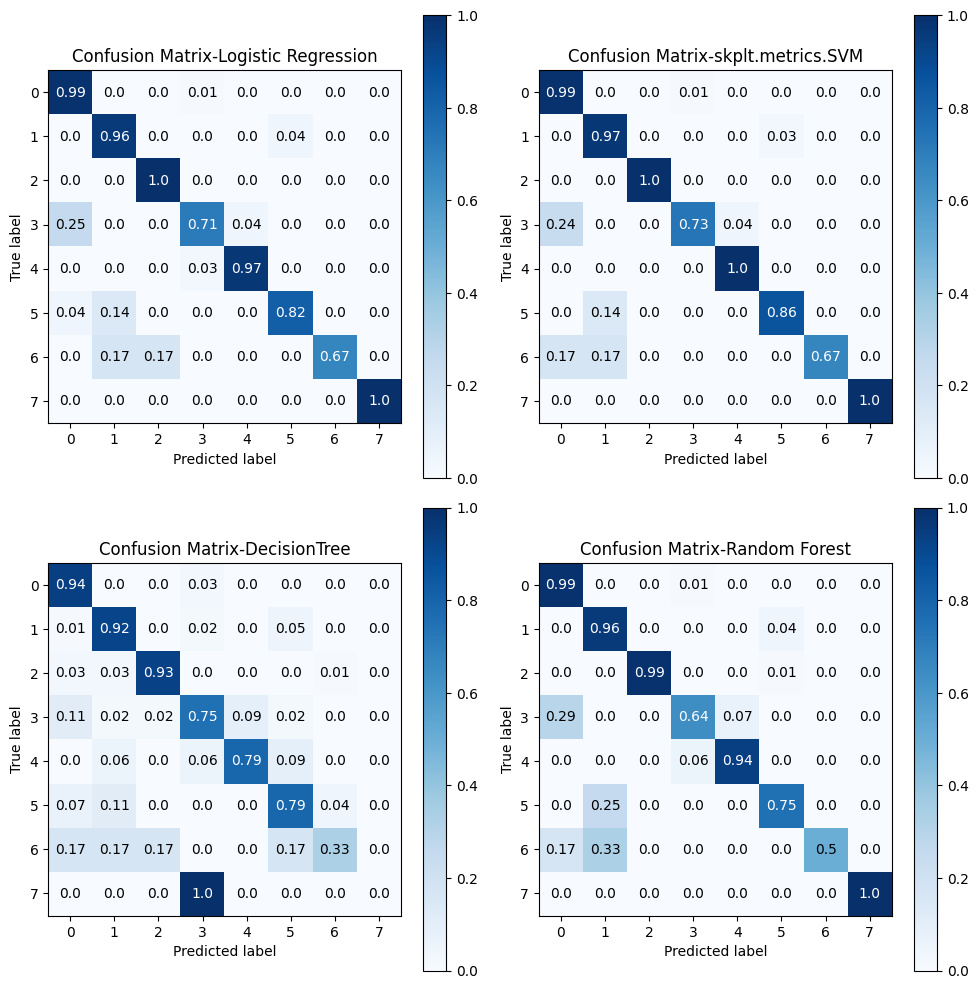

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

In [21]:
# 创建一个包含4个子图的画布，排列为2行2列
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  

# 在每个子图上绘制混淆矩阵
skplt.metrics.plot_confusion_matrix(y_test, y_pred_log_reg, normalize=True, ax=axs[0, 0], title='Confusion Matrix-Logistic Regression')
skplt.metrics.plot_confusion_matrix(y_test, y_pred_svm, normalize=True, ax=axs[0, 1], title='Confusion Matrix-skplt.metrics.SVM')
skplt.metrics.plot_confusion_matrix(y_test, y_pred_dt, normalize=True, ax=axs[1, 0], title='Confusion Matrix-DecisionTree')
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rf, normalize=True, ax=axs[1, 1], title='Confusion Matrix-Random Forest')

# 调整子图之间的间距
plt.tight_layout()

# 显示画布
plt.show()

<h3>4.3 Precision、Recall、F1score

In [28]:
print("Classification Report of LogisticRegression:\n", classification_report(y_test, y_pred_log_reg))
print("Classification Report of SVM:\n", classification_report(y_test, y_pred_svm))
print("Classification Report of DecisionTree:\n", classification_report(y_test, y_pred_dt))
print("Classification Report of RandomForest:\n", classification_report(y_test, y_pred_rf))

Classification Report of LogisticRegression:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       229
           1       0.95      0.96      0.96       104
           2       0.99      1.00      0.99        70
           3       0.91      0.71      0.80        55
           4       0.94      0.97      0.96        34
           5       0.85      0.82      0.84        28
           6       1.00      0.67      0.80         6
           7       1.00      1.00      1.00         2

    accuracy                           0.94       528
   macro avg       0.95      0.89      0.91       528
weighted avg       0.94      0.94      0.94       528

Classification Report of SVM:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       229
           1       0.95      0.97      0.96       104
           2       1.00      1.00      1.00        70
           3       0.93      0.73      0.82        55
 

Error: INVALID mime type: status. Must be in the format "type/subtype[;optionalparameter]"

<h2>5.评估依据及结果分析

使用逻辑回归、支持向量机svm、决策树、随机森林4种模型依据细胞基因表达信息进行分类预测，通过准确率、混淆矩阵、查准率、召回率、F1分数4个指标评估模型效果，并使用scikitplot可视化结果。

（1）准确率
准确率是最直观的性能指标，它表示模型预测正确的样本数占总样本数的比例。支持向量机的准确率最高，逻辑回归模型次之，随机森林第三，决策树最低。逻辑回归模型的准确率为0.9413，svm为0.9489,决策树为0.8883,随机森林为0.9242。由于随机森林为决策树的集成，因此准确率高于决策树。

（2）混淆矩阵  
混淆矩阵提供了一个全面的视图，显示了模型在各个类别上的分类性能。它不仅显示了正确分类的样本数，还显示了错误分类的样本数，从而可以评估模型在每个类别上的表现，包括那些可能被模型错误分类的类别。混淆矩阵每一行代表样本的真实类别，每一列代表样本的预测类别，正确的分类样本都分布在对角线上，其余为预测错误的样本。  
其中可以看出，四种模型对于0、1、2类细胞预测效果较好，准确率在0.9以上，细胞类型3和6的预测效果不佳，准确率分别为0.7和0.5左右。特别地，决策树模型将所有的细胞类型7（NK细胞）预测为3（CD4T细胞）。整体效果svm>逻辑回归>随机森林>决策树。

由于ROC曲线和PR曲线主要用于二分类模型，此处共8类细胞，应为多分类模型，因此使用classification_report函数计算模型对多个类别预测的查准率、召回率和F1分数。其中，三个指标均分为micro average、weighted average和macro average。  

micro average关注的是整体性能，它不会受到类别不平衡的影响，因此在类别分布不均的数据集中可以提供一个整体评估。macro average对所有类别给予相同的权重，因此它对每个类别的性能同样关心，可以更好地反映模型在小类别上的表现。weighted average为每个类别赋予一个权重，这个权重通常与该类别的样本数量成比例，适用于处理细胞等不平衡的数据。

由于本细胞基因数据不平衡性较强，而我们对每个类别的预测性能都较为关心，因此我们关注macro和weighted average。

（3）查准率。查准率反映了在所有被模型预测为正类的样本中，实际为正类的比例。SVM最高，逻辑回归第二，随机森林第三，决策树最差。  
macro average：逻辑回归0.95，SVM0.96，决策树0.69，随机森林0.93  
weighted average：逻辑回归0.94，SVM0.95，决策树0.89，随机森林0.92

（4）召回率。反映了模型捕捉正类样本的能力，召回率越高，意味着模型漏掉的正类样本越少。SVM第一，逻辑回归第二，随机森林第三，决策树第四。   
macro average：逻辑回归0.89，SVM0.90，决策树0.68，随机森林0.85   
weighted average：逻辑回归0.94，SVM0.95，决策树0.89，随机森林0.92

（5）F1分数。F1分数是精确率和召回率的调和平均数，用于衡量模型的准确性和完整性的平衡。SVM第一，逻辑回归第二，随机森林第三，决策树第四。  
macro average：逻辑回归0.91，SVM0.92，决策树0.68，随机森林0.87  
weighted average：逻辑回归0.94，SVM0.95，决策树0.89，随机森林0.92

**综上，结合准确率、macro和weighted查准率、召回率、F1分数知，四种分类模型中支持向量机预测效果最好，逻辑回归次之，随机森林第三，决策树最后，前三种模型的预测效果明显优于决策树。**  

